In [123]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import (
    LabelEncoder,
    Normalizer,
    OneHotEncoder,
    StandardScaler,
)

**1. Carga el dataset a analizar en la parte A (titanic.csv) con pandas y elimina
los valores nulos y duplicados. ¿Cuántas filas se han borrado? ¿En qué
beneficia su eliminación? Con reset_index resetea los índices para evitar
problemas en los ejercicios siguientes.**

In [124]:
df = pd.read_csv("titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [125]:
len_df_1 = len(df)
df = df.dropna()
df = df.drop_duplicates()
len_df_2 = len(df)
print(f"Número de filas originales: {len_df_1}")
print(f"Número de filas después de eliminar NA y duplicados: {len_df_2}")
print(f"Numero de filas borradas: {len_df_1 - len_df_2}")

Número de filas originales: 891
Número de filas después de eliminar NA y duplicados: 183
Numero de filas borradas: 708


In [126]:
df = df.reset_index()

Se han borrado `891 - 183 = 708` filas
Su eliminación beneficia en que se quitan instancias que pueden estar incompletas y puedan resultar reduntantes redundantes.

**2. Antes de empezar, determina si hay algún atributo no nos va a resultar útil y
por qué.**

Los atributos que puede que no nos resulten utiles son `"PassengerId"`, `"Name"`, `"Ticket"`, `"Fare"` y `"Embarked"`, porque son identificadores de los pasajeros y no aportan información relevante para el análisis.

**3. Relaciones entre atributos: dibuja diagramas de dispersión y calcula
coeficientes de correlación. ¿Cuáles son los atributos que están más
relacionados y qué podemos interpretar?**

In [127]:
columns = ["Survived", "Pclass", "Age", "SibSp", "Parch", "Fare"]

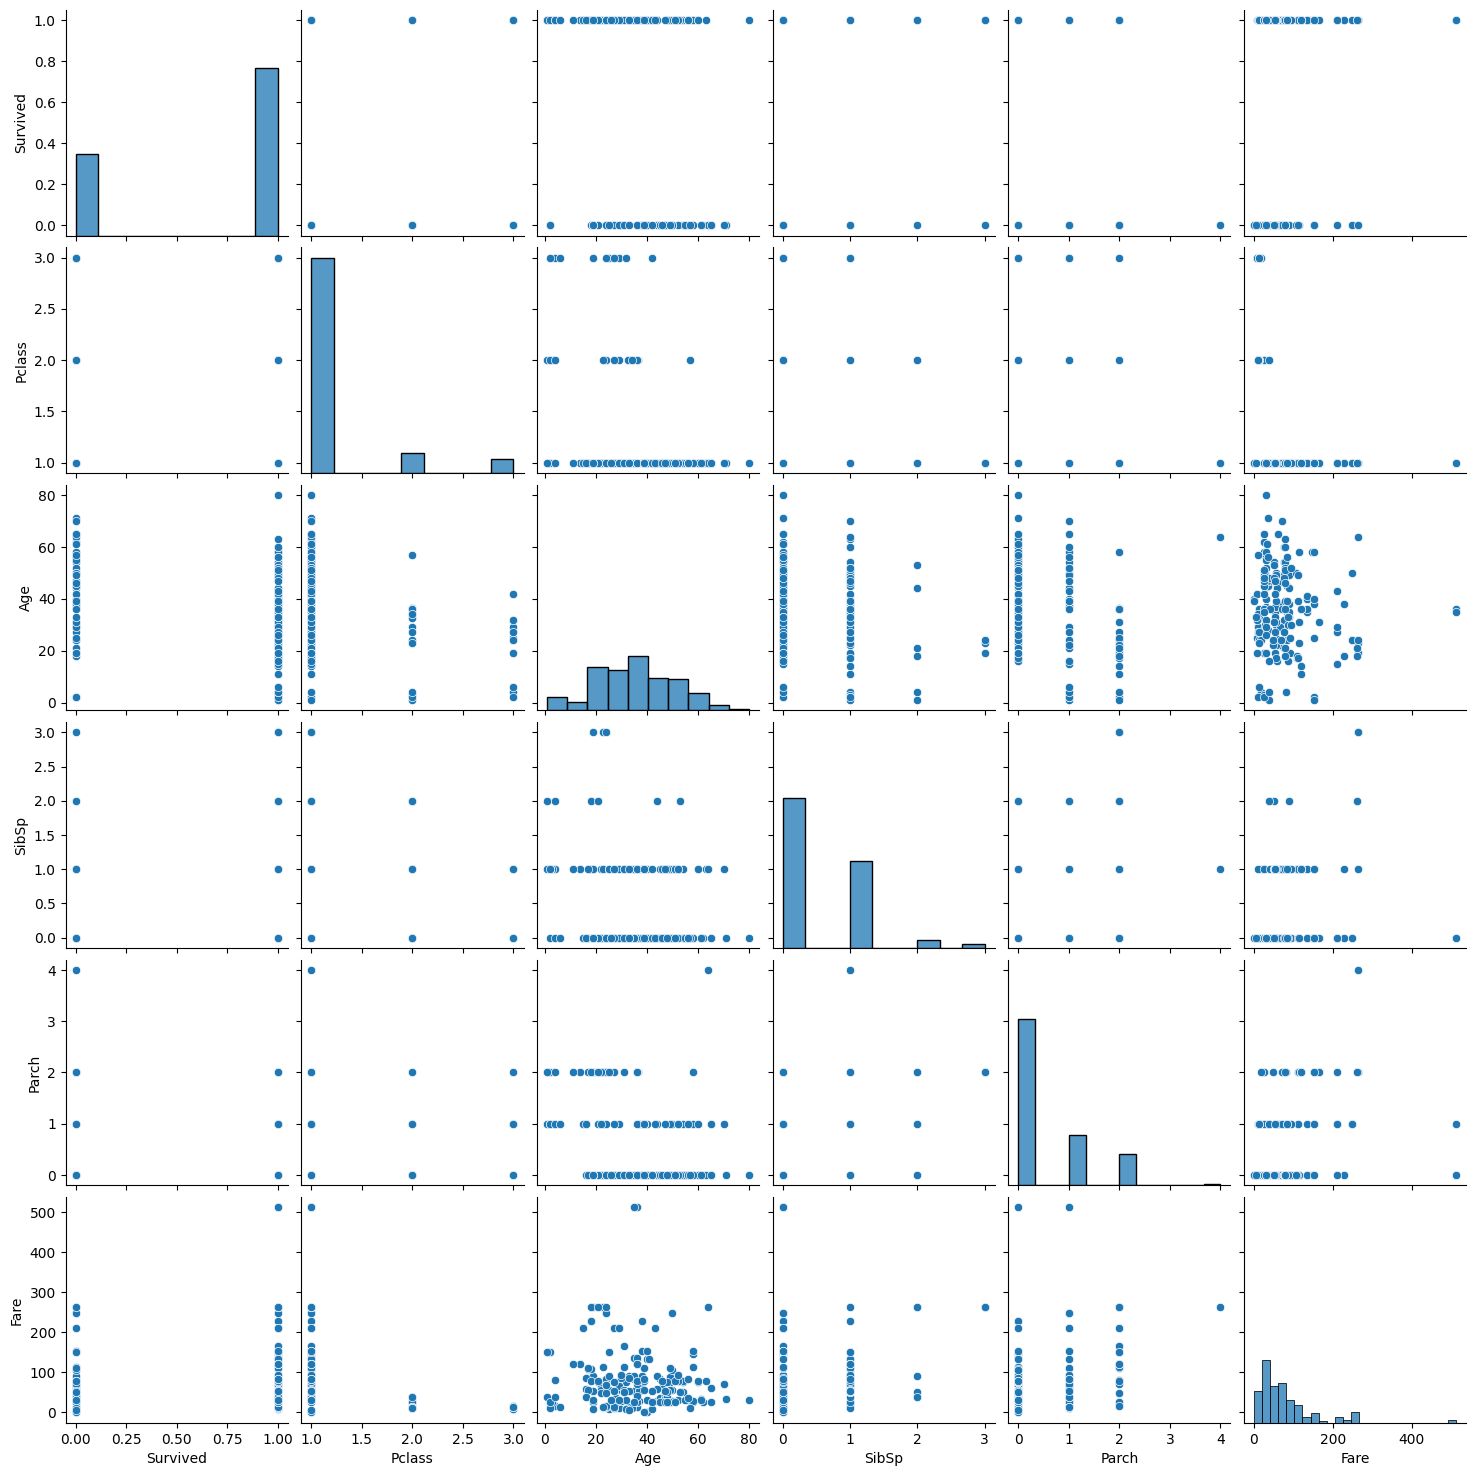

In [128]:
sns.pairplot(df[columns])
plt.show()

In [129]:
df[columns].corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.034542,-0.254085,0.106346,0.023582,0.134241
Pclass,-0.034542,1.000000,-0.306514,-0.103592,0.047496,-0.315235
Age,-0.254085,-0.306514,1.000000,-0.156162,-0.271271,-0.092424
SibSp,0.106346,-0.103592,-0.156162,1.000000,0.255346,0.286433
Parch,0.023582,0.047496,-0.271271,0.255346,1.000000,0.389740
Fare,0.134241,-0.315235,-0.092424,0.286433,0.389740,1.000000


Los atributos más relacionados son la clase del pasajero y si ha sobrevivido o no (las personas más ricas salieron antes), la edad y la clase (puede que la gente con más poder adquisitivo fuera más mayor), la edad y el número de conyuges (a más edad menos posibilidad de tener más familiares vivos) y el número de conyuges y el número de padres o hijos (por razones obvias).

**4. Atributos numéricos:
a. Calcula media, desviación típica, valores mínimos, máximos, etc. de
los atributos numéricos. Describe estos valores para cada variable.**

In [130]:
df.describe()

,index,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000
mean,454.366120,455.366120,0.672131,1.191257,35.674426,0.464481,0.475410,78.682469
std,247.052476,247.052476,0.470725,0.515187,15.643866,0.644159,0.754617,76.347843
min,1.000000,2.000000,0.000000,1.000000,0.920000,0.000000,0.000000,0.000000
25%,262.500000,263.500000,0.000000,1.000000,24.000000,0.000000,0.000000,29.700000
50%,456.000000,457.000000,1.000000,1.000000,36.000000,0.000000,0.000000,57.000000
75%,675.000000,676.000000,1.000000,1.000000,47.500000,1.000000,1.000000,90.000000
max,889.000000,890.000000,1.000000,3.000000,80.000000,3.000000,4.000000,512.329200


**5. Atributos categóricos:
a. Dibuja histogramas, diagramas de barras o de tartas para
determinar las frecuencias de los valores de los atributos
categóricos. Indica el número de valores distintos para cada atributo
y el valor más frecuente para cada atributo. ¿Qué atributos están
balanceados y cuáles no?**

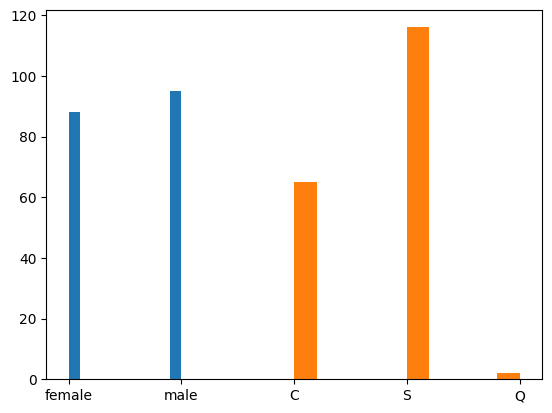

In [131]:
columns = ["Sex", "Embarked"]
for column in columns:
    plt.hist(df[column])
plt.show()

Obviando los que no nos resultan útiles, el atributos categóricos `"Sex"` tiene 2 posibles valores con `"male"` como más frecuente y `"Embarked"` tiene 3 con `"S"` como más frecuente. `"Sex"` está balanceado mientras que la mayoría de los pasajeros embarcaron en `"S"` (Southampton).

**6. Determina si hay outliers. Fíjate en las gráficas y descripciones que has
empezado antes.**

Depende del criterio usado, pero se podría decir que hay outliers en los pasajeros que más pagaron, en los pasajeros que tienen una gran cantidad de familiares y/o hijos y en los pasajeros con las edades más avanzadas.

**7. Convierte los atributos categóricos en valores numéricos usando
OneHotEncoder (o getdummies) y LabelEnconder. Observa las diferencias
y discute cuál sería la mejor opción cuando el dataset sea usado en un
modelo de IA.**

In [132]:
columns = ["Sex", "Embarked"]

In [133]:
label_encoder = LabelEncoder()
for column in columns:
    df[f"{column}_LE"] = label_encoder.fit_transform(df[column])

In [134]:
encoder = OneHotEncoder(sparse_output=False)
df[
    list(map(lambda column: f"{column}_OHE", encoder.get_feature_names_out(columns)))
] = encoder.fit_transform(df[columns])

In [135]:
df.head()

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_LE,Embarked_LE,Sex_female_OHE,Sex_male_OHE,Embarked_C_OHE,Embarked_Q_OHE,Embarked_S_OHE
0,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,0,1.0,0.0,1.0,0.0,0.0
1,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,2,1.0,0.0,0.0,0.0,1.0
2,6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,1,2,0.0,1.0,0.0,0.0,1.0
3,10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,0,2,1.0,0.0,0.0,0.0,1.0
4,11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,0,2,1.0,0.0,0.0,0.0,1.0


Siempre depende del uso, pero en este caso, generalmente es preferible usar el `OneHotEncoder` debido a que el `LabelEncoder` asume que los valores resultantes de la codificación de los atributos categoricos está relacionada entre sí segun una ordenación numerica, cuando no es así.

**8. Normaliza y estandariza el dataset. Observa los resultados. Discute qué
opción sería mejor usar.**

In [136]:
columns = ["Age", "SibSp", "Parch", "Fare"]

In [137]:
normalizer = Normalizer()
df[
    list(map(lambda column: f"{column}_N", normalizer.get_feature_names_out(columns)))
] = normalizer.fit_transform(df[columns])

In [138]:
scaler = StandardScaler()
df[list(map(lambda column: f"{column}_SS", scaler.get_feature_names_out(columns)))] = (
    scaler.fit_transform(df[columns])
)

In [139]:
df.head()

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,...,Embarked_Q_OHE,Embarked_S_OHE,Age_N,SibSp_N,Parch_N,Fare_N,Age_SS,SibSp_SS,Parch_SS,Fare_SS
0,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,...,0.0,0.0,0.470381,0.012378,0.000000,0.882377,0.149065,0.833628,-0.631730,-0.097180
1,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,...,0.0,1.0,0.550270,0.015722,0.000000,0.834839,-0.043230,0.833628,-0.631730,-0.335997
2,6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,...,0.0,1.0,0.721237,0.000000,0.000000,0.692688,1.174636,-0.723044,-0.631730,-0.352250
3,10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,...,0.0,1.0,0.232147,0.058037,0.058037,0.969212,-2.030273,0.833628,0.697081,-0.814070
4,11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,...,0.0,1.0,0.909263,0.000000,0.000000,0.416223,1.431029,-0.723044,-0.631730,-0.684702


`Normalizer` actúa por fila y `StandardScaler` por columna. En este caso nos interesa escalar por columna para no modificar las relaciones entre ellas.